In [ ]:
import numpy as np
from scipy.spatial import Voronoi, distance
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, calinski_harabasz_score
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

#Método simple
def KMeansVoronoiInit(X, nClusters, iterMax):
    #Generar el diagrama de Voronoi
    vor = Voronoi(X)

    #Calcular la distancia de cada vértice al punto de datos más cercano
    distances = distance.cdist(vor.vertices, X, 'euclidean')
    minDistances = np.min(distances, axis=1)

    #Seleccionar los n vértices con las mayores distancias mínimas
    furthestVertices = vor.vertices[np.argsort(minDistances)[:nClusters]]

    #K-means con inicialización en los vértices más lejanos
    kmeansVoronoi = KMeans(n_clusters=nClusters, init=furthestVertices, n_init=1, max_iter=iterMax)
    kmeansVoronoi.fit(X)
    return kmeansVoronoi

def KMeansRandomInit(X, n_clusters, iter_max, seed):

    kmeansRandom = KMeans(n_clusters=n_clusters, init='random', n_init=1, max_iter=iter_max, random_state=seed)
    kmeansRandom.fit(X)
    return kmeansRandom

#Generar diferentes conjuntos de datos
def GenerateDatasets(selectedNoise, nClusters):

    # Datos tipo círculos
    X_circles, _ = make_circles(n_samples=1000, factor=0.3, noise=selectedNoise, random_state=0)

    # Datos tipo blobs
    X_blobs, _ = make_blobs(n_samples=1000, centers=nClusters, cluster_std=0.60, random_state=0)

    # Datos tipo lunas
    X_moons, _ = make_moons(n_samples=1000, noise=selectedNoise, random_state=0)

    return X_circles, X_blobs, X_moons

def PlotExecution(X, labelsVoronoi, centroidsVoronoi, labelsRandom, centroidsRandom, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=labelsVoronoi, cmap='viridis', s=50)
    plt.scatter(centroidsVoronoi[:, 0], centroidsVoronoi[:, 1], c='red', s=200, marker='x')
    plt.title("Voronoi")

    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=labelsRandom, cmap='viridis', s=50)
    plt.scatter(centroidsRandom[:, 0], centroidsRandom[:, 1], c='red', s=200, marker='x')
    plt.title("Aleatorio")

    plt.show()

In [ ]:
blobClusters = 3
# Generar datasets
X_circles, X_blobs, X_moons = GenerateDatasets(0.05, blobClusters)

# Normalizar los datos
X_circles = StandardScaler().fit_transform(X_circles)
X_blobs = StandardScaler().fit_transform(X_blobs)
X_moons = StandardScaler().fit_transform(X_moons)

<ipython-input-4-a3ac64f824df>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_blobs[:, 0], X_blobs[:, 1], cmap='viridis', s=50)
<ipython-input-4-a3ac64f824df>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_circles[:, 0], X_circles[:, 1], cmap='viridis', s=50)
<ipython-input-4-a3ac64f824df>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_moons[:, 0], X_moons[:, 1], cmap='viridis', s=50)


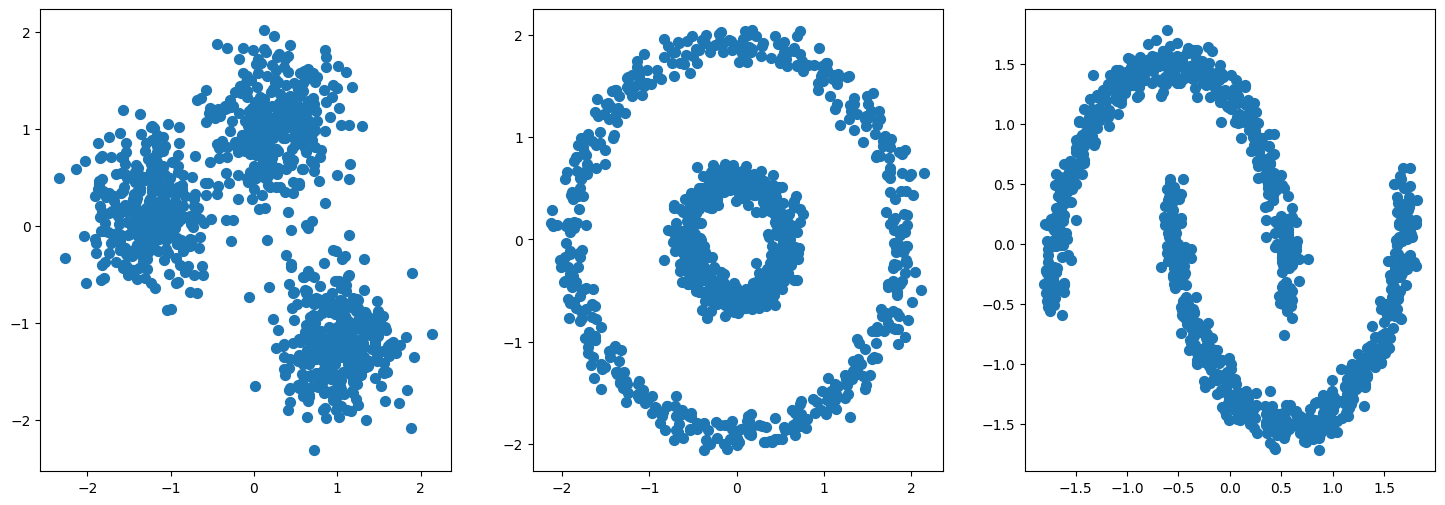

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], cmap='viridis', s=50)

plt.subplot(1, 3, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], cmap='viridis', s=50)

plt.subplot(1, 3, 3)
plt.scatter(X_moons[:, 0], X_moons[:, 1], cmap='viridis', s=50)

plt.show()

In [ ]:
def CompareKMeansInitializations(X, nClusters, nSeeds, iterMax, plot = True):
    results = {}
    #Inicialización Voronoi
    kmeansVoronoi = KMeansVoronoiInit(X, nClusters, iterMax)
    centroidsVoronoi = kmeansVoronoi.cluster_centers_
    labelsVoronoi = kmeansVoronoi.labels_

    results['kmeansVoronoi'] = kmeansVoronoi
    results['centroidsVoronoi'] = centroidsVoronoi
    results['labelsVoronoi'] = labelsVoronoi
    #Inicialización aleatoria
    scoreRandomList = []

    for seed in range(nSeeds):
        kMeansRandom = KMeansRandomInit(X, nClusters,iterMax, seed)
        centroidsRandom = kMeansRandom.cluster_centers_
        labelsRandom = kMeansRandom.labels_

        scoreRandom = calinski_harabasz_score(X, labelsRandom)
        scoreRandomList.append(scoreRandom)

    meanScoreRandom = np.mean(scoreRandomList)

    #Imprimir resultados
    mseVoronoi = calinski_harabasz_score(X, labelsVoronoi)
    if(plot):
      PlotExecution(X, labelsVoronoi, centroidsVoronoi, labelsRandom, centroidsRandom, "Blobs")

    results['kMeansRandom'] = kMeansRandom
    results['centroidsRandom'] = centroidsRandom
    results['labelsRandom'] = labelsRandom
    results['meanScoreRandom'] = meanScoreRandom

    return results

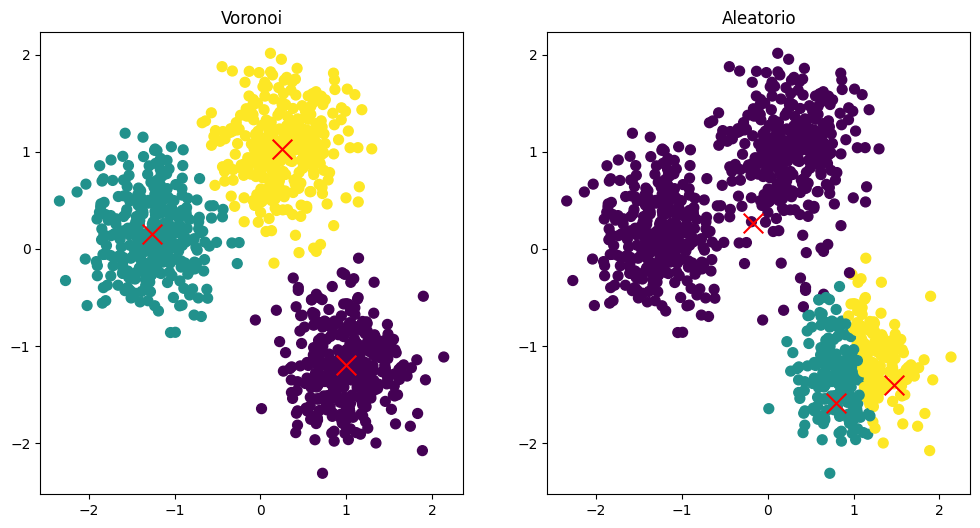

In [ ]:
resultsBlobs1Iter = CompareKMeansInitializations(X_blobs, nClusters=3, nSeeds=1000, iterMax=1)

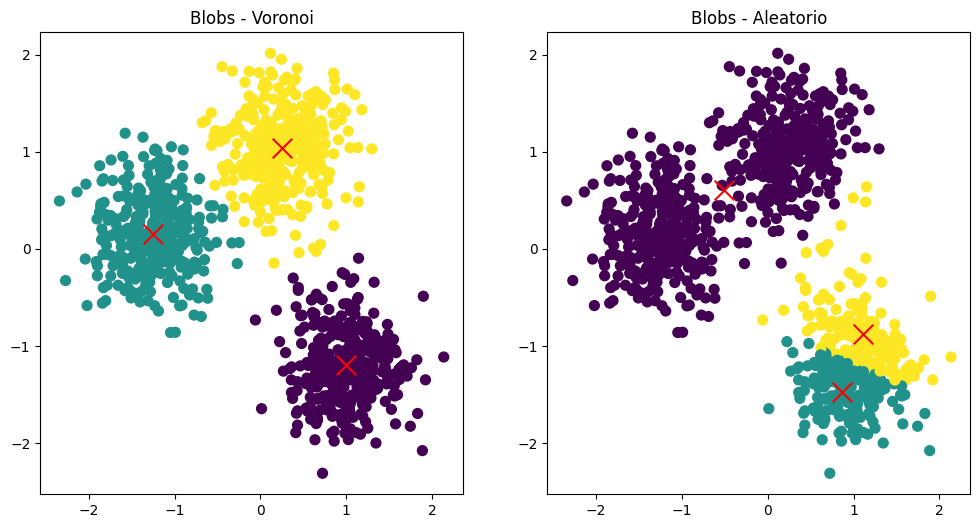

In [ ]:
resultsBlobs10Iter = CompareKMeansInitializations(X_blobs, nClusters=3, nSeeds=1000, iterMax=10)

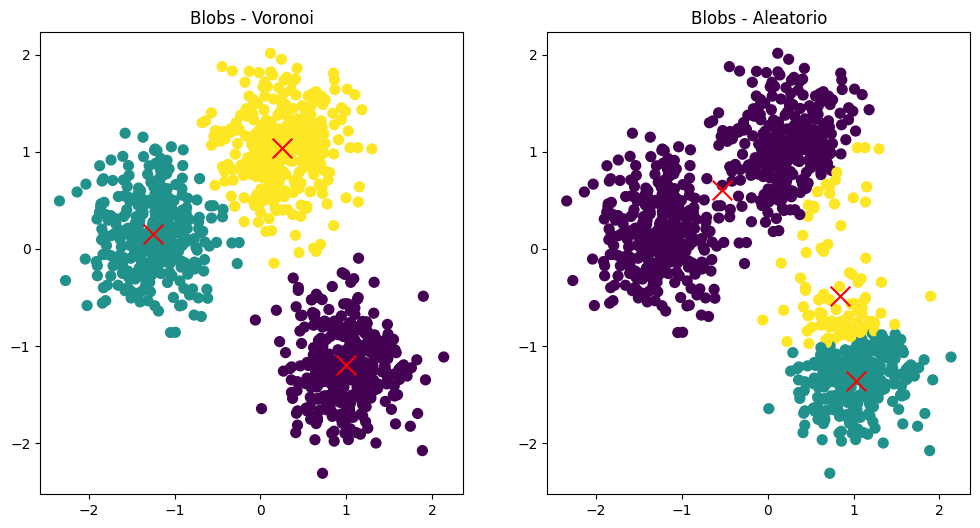

In [ ]:
resultsBlobs25Iter = CompareKMeansInitializations(X_blobs, nClusters=3, nSeeds=1000, iterMax=25)

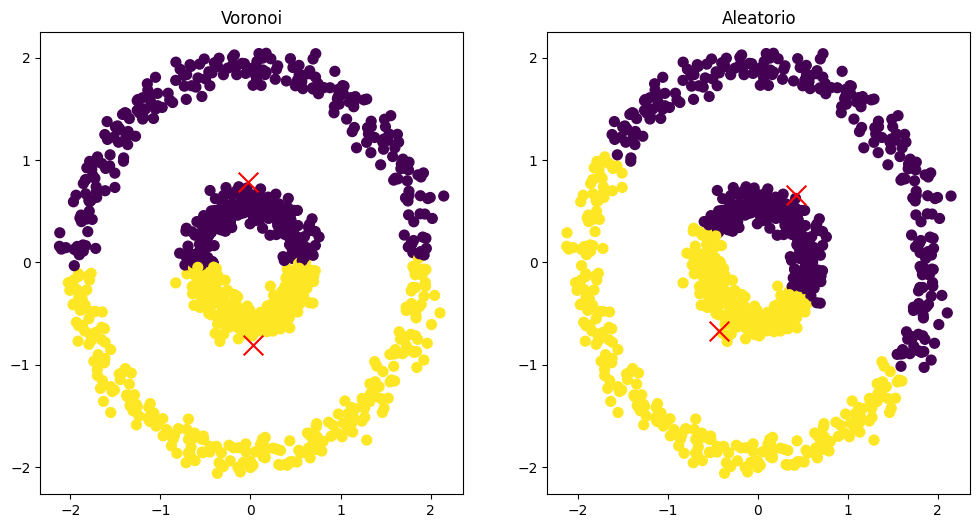

In [ ]:
resultsCircles1Iter = CompareKMeansInitializations(X_circles, nClusters=2, nSeeds=1000, iterMax=1)

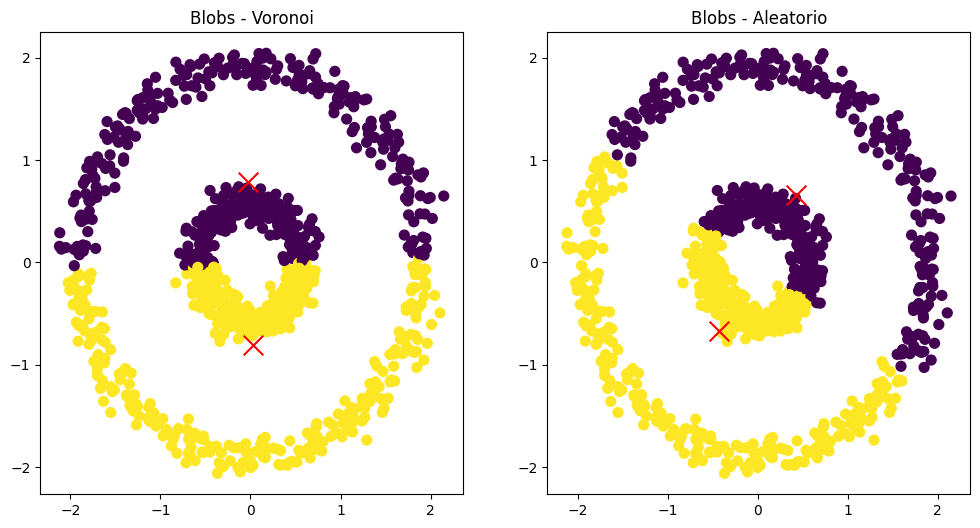

In [ ]:
resultsCircles10Iter = CompareKMeansInitializations(X_circles, nClusters=2, nSeeds=1000, iterMax=10)

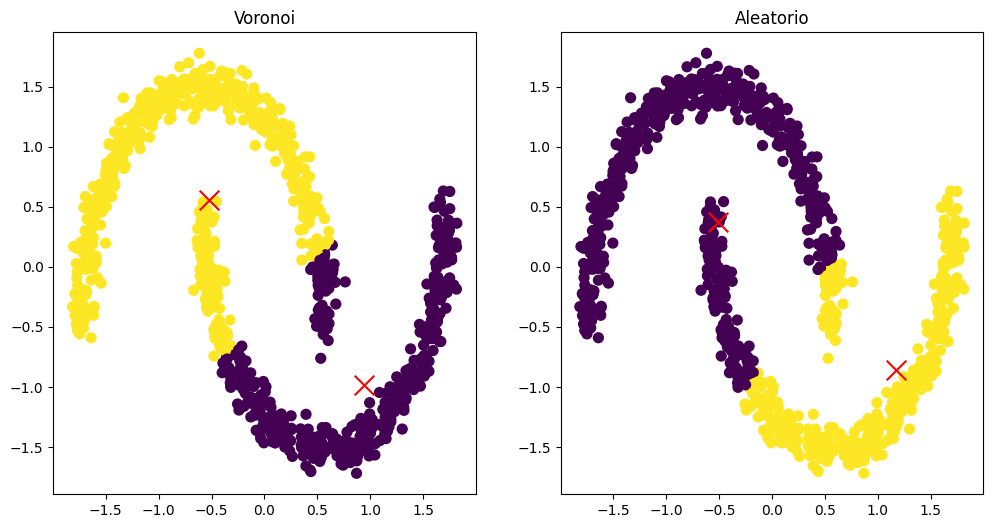

In [ ]:
resultsMoons1Iter = CompareKMeansInitializations(X_moons, nClusters=2, nSeeds=1000, iterMax=1)

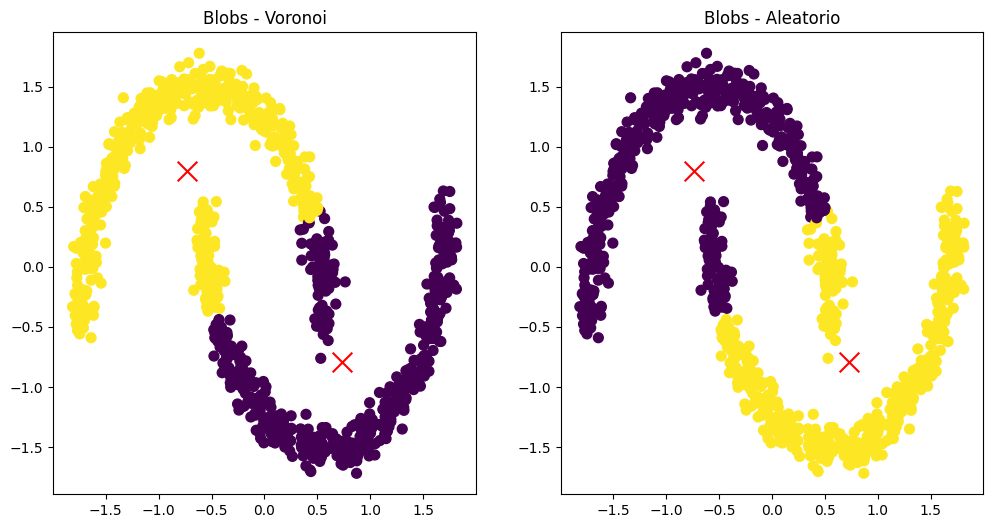

In [ ]:
resultsMoons10Iter = CompareKMeansInitializations(X_moons, nClusters=2, nSeeds=1000, iterMax=10)

Score con inicialización basada en vértices de Voronoi (Lunas): 1338.8875973994825
Score con inicialización aleatoria (Lunas): 1130.8270953890897


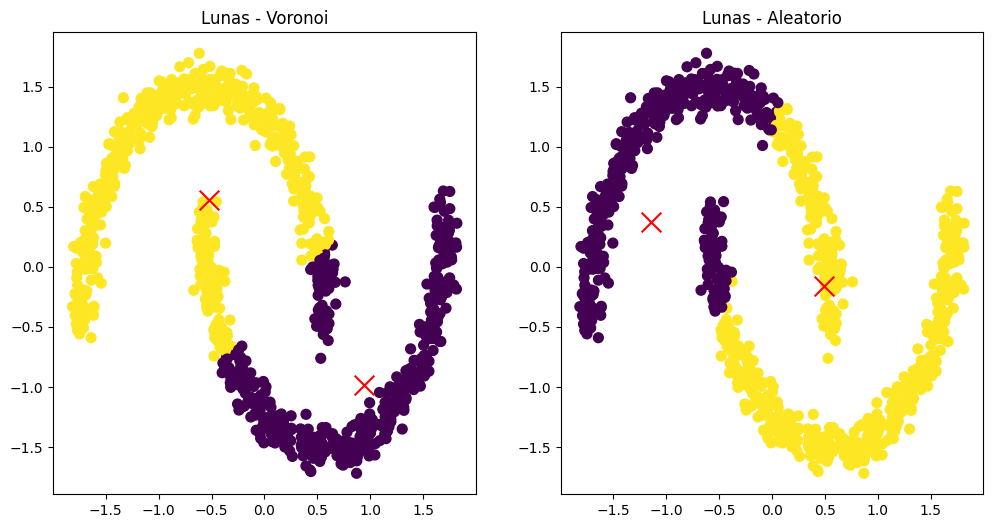

In [ ]:
# Comparar K-means con inicialización basada en Voronoi y aleatoria para lunas
kmeansVoronoiMoons = KMeansVoronoiInit(X_moons, 2, 1)
centroidsVoronoiMoons = kmeansVoronoiMoons.cluster_centers_
labelsVoronoiMoons = kmeansVoronoiMoons.labels_

kmeansRandomMoons = KMeansRandomInit(X_moons, 2, 1, 0)
centroidsRandomMoons = kmeansRandomMoons.cluster_centers_
labelsRandomMoons = kmeansRandomMoons.labels_

scoreVoronoiMoons = calinski_harabasz_score(X_moons, labelsVoronoiMoons)
scoreRandomMoons = calinski_harabasz_score(X_moons, labelsRandomMoons)

print(f"Score con inicialización basada en vértices de Voronoi (Lunas): {scoreVoronoiMoons}")
print(f"Score con inicialización aleatoria (Lunas): {scoreRandomMoons}")

PlotExecution(X_moons, labelsVoronoiMoons, centroidsVoronoiMoons, labelsRandomMoons, centroidsRandomMoons, "Lunas")

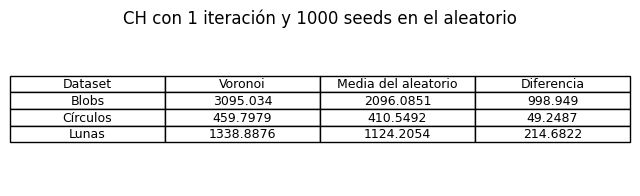

In [ ]:
scoreVoronoiBlobs = calinski_harabasz_score(X_blobs, resultsBlobs1Iter['labelsVoronoi'])
scoreRandomBlobs = resultsBlobs1Iter['meanScoreRandom']

scoreVoronoiCircles = calinski_harabasz_score(X_circles, resultsCircles1Iter['labelsVoronoi'])
scoreRandomCircles = resultsCircles1Iter['meanScoreRandom']

scoreVoronoiMoons = calinski_harabasz_score(X_moons, resultsMoons1Iter['labelsVoronoi'])
scoreRandomMoons = resultsMoons1Iter['meanScoreRandom']

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Dataset': ['Blobs', 'Círculos', 'Lunas'],
    'Voronoi': [round(scoreVoronoiBlobs, 4), round(scoreVoronoiCircles, 4), round(scoreVoronoiMoons, 4)],
    'Media del aleatorio': [round(scoreRandomBlobs, 4), round(scoreRandomCircles, 4), round(scoreRandomMoons, 4)],
    'Diferencia': [round(scoreVoronoiBlobs - scoreRandomBlobs, 4), round(scoreVoronoiCircles - scoreRandomCircles, 4), round(scoreVoronoiMoons - scoreRandomMoons, 4)]
})

# Mostrar la tabla
plt.figure(figsize=(8, 2))
plt.table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
plt.axis('off')
plt.title('CH con 1 iteración y 1000 seeds en el aleatorio')
plt.show()


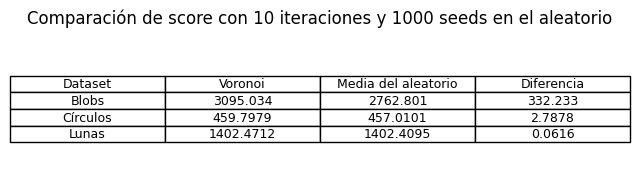

In [ ]:
scoreVoronoiBlobs = calinski_harabasz_score(X_blobs, resultsBlobs10Iter['labelsVoronoi'])
scoreRandomBlobs = resultsBlobs10Iter['meanScoreRandom']

scoreVoronoiCircles = calinski_harabasz_score(X_circles, resultsCircles10Iter['labelsVoronoi'])
scoreRandomCircles = resultsCircles10Iter['meanScoreRandom']

scoreVoronoiMoons = calinski_harabasz_score(X_moons, resultsMoons10Iter['labelsVoronoi'])
scoreRandomMoons = resultsMoons10Iter['meanScoreRandom']

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Dataset': ['Blobs', 'Círculos', 'Lunas'],
    'Voronoi': [round(scoreVoronoiBlobs, 4), round(scoreVoronoiCircles, 4), round(scoreVoronoiMoons, 4)],
    'Media del aleatorio': [round(scoreRandomBlobs, 4), round(scoreRandomCircles, 4), round(scoreRandomMoons, 4)],
    'Diferencia': [round(scoreVoronoiBlobs - scoreRandomBlobs, 4), round(scoreVoronoiCircles - scoreRandomCircles, 4), round(scoreVoronoiMoons - scoreRandomMoons, 4)]
})

# Mostrar la tabla
plt.figure(figsize=(8, 2))
plt.table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
plt.axis('off')
plt.title('Comparación de score con 10 iteraciones y 1000 seeds en el aleatorio')
plt.show()

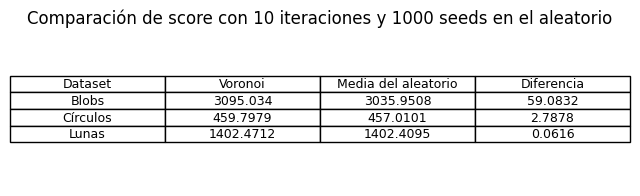

In [ ]:
scoreVoronoiBlobs = calinski_harabasz_score(X_blobs, resultsBlobs25Iter['labelsVoronoi'])
scoreRandomBlobs = resultsBlobs25Iter['meanScoreRandom']

scoreVoronoiCircles = calinski_harabasz_score(X_circles, resultsCircles10Iter['labelsVoronoi'])
scoreRandomCircles = resultsCircles10Iter['meanScoreRandom']

scoreVoronoiMoons = calinski_harabasz_score(X_moons, resultsMoons10Iter['labelsVoronoi'])
scoreRandomMoons = resultsMoons10Iter['meanScoreRandom']

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Dataset': ['Blobs', 'Círculos', 'Lunas'],
    'Voronoi': [round(scoreVoronoiBlobs, 4), round(scoreVoronoiCircles, 4), round(scoreVoronoiMoons, 4)],
    'Media del aleatorio': [round(scoreRandomBlobs, 4), round(scoreRandomCircles, 4), round(scoreRandomMoons, 4)],
    'Diferencia': [round(scoreVoronoiBlobs - scoreRandomBlobs, 4), round(scoreVoronoiCircles - scoreRandomCircles, 4), round(scoreVoronoiMoons - scoreRandomMoons, 4)]
})

# Mostrar la tabla
plt.figure(figsize=(8, 2))
plt.table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
plt.axis('off')
plt.title('Comparación de score con 10 iteraciones y 1000 seeds en el aleatorio')
plt.show()

In [ ]:

kmeansVoronoiBlobs = KMeansVoronoiInit(X_blobs, 3, 300)
centroidsVoronoiBlobs = kmeansVoronoiBlobs.cluster_centers_
labelsVoronoiBlobs= kmeansVoronoiBlobs.labels_

kmeansRandomBlobs = KMeansRandomInit(X_blobs, 3, 300, 0)
centroidsRandomBlobs = kmeansRandomBlobs.cluster_centers_
labelsRandomBlobs = kmeansRandomBlobs.labels_

scoreVoronoiBlobs= calinski_harabasz_score(X_blobs, labelsVoronoiBlobs)
scoreRandomBlobs = calinski_harabasz_score(X_blobs, labelsRandomBlobs)

print(f"Score con inicialización basada en vértices de Voronoi (Blobs): {scoreVoronoiBlobs}")
print(f"Score con inicialización aleatoria (Blobs): {scoreRandomBlobs}")

Score con inicialización basada en vértices de Voronoi (Blobs): 3095.0340292359256
Score con inicialización aleatoria (Blobs): 3095.0309973787244


In [ ]:
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X_iris = iris.data
Y_iris = iris.target
X = pd.DataFrame(X_iris, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris)

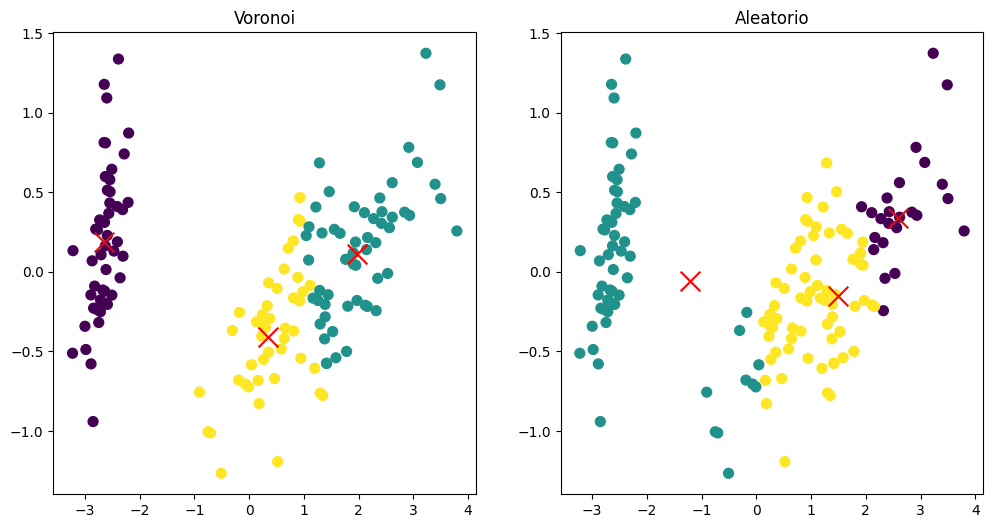

In [ ]:
resultsIrisPCA1Iter = CompareKMeansInitializations(X_iris_pca, nClusters=3, nSeeds=100, iterMax=1)

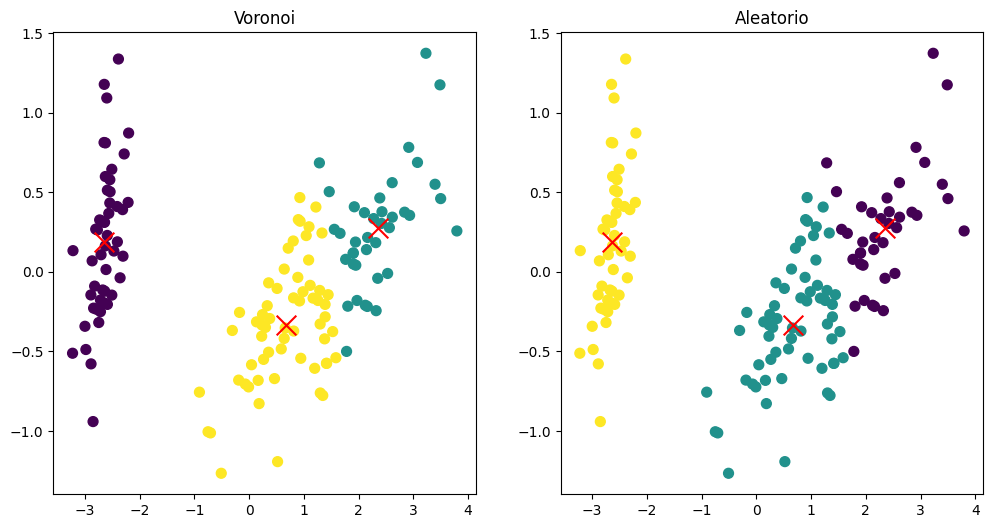

In [ ]:
resultsIrisPCA10Iter = CompareKMeansInitializations(X_iris_pca, nClusters=3, nSeeds=1000, iterMax=10)

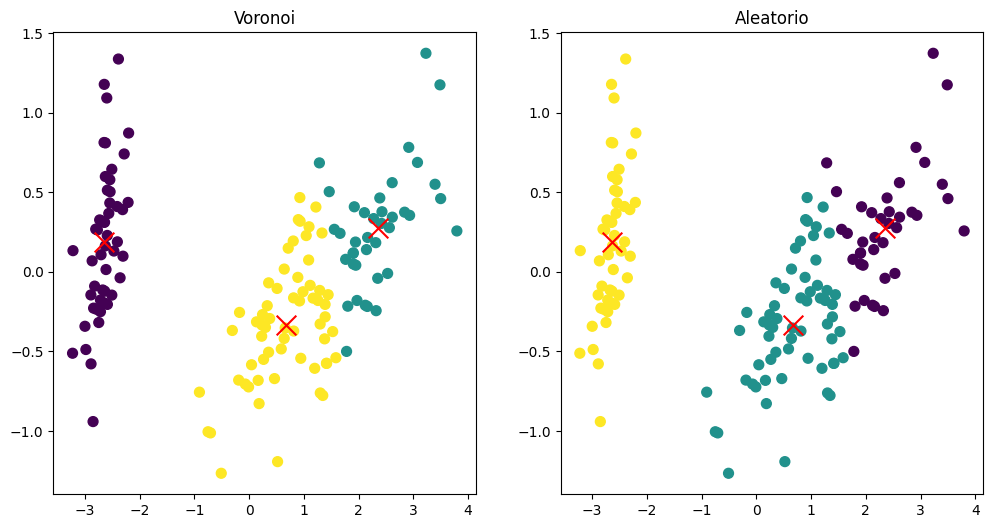

In [ ]:
resultsIrisPCA25Iter = CompareKMeansInitializations(X_iris_pca, nClusters=3, nSeeds=1000, iterMax=50)

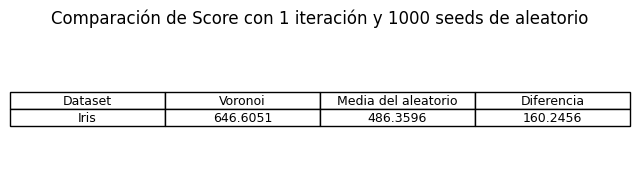

In [ ]:
scoreVoronoiIrisPCA = calinski_harabasz_score(X_iris_pca, resultsIrisPCA1Iter['labelsVoronoi'])
scoreRandomIrisPCA = resultsIrisPCA1Iter['meanScoreRandom']


# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Dataset': ['Iris'],
    'Voronoi': [round(scoreVoronoiIrisPCA, 4)],
    'Media del aleatorio': [round(scoreRandomIrisPCA, 4)],
    'Diferencia': [round(scoreVoronoiIrisPCA - scoreRandomIrisPCA, 4)]
})

# Mostrar la tabla
plt.figure(figsize=(8, 2))
plt.table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
plt.axis('off')
plt.title('Comparación de Score con 1 iteración y 1000 seeds de aleatorio')
plt.show()

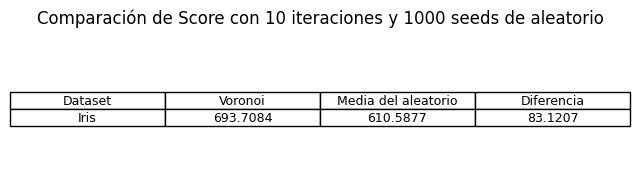

In [ ]:
scoreVoronoiIrisPCA = calinski_harabasz_score(X_iris_pca, resultsIrisPCA10Iter['labelsVoronoi'])
scoreRandomIrisPCA = resultsIrisPCA10Iter['meanScoreRandom']


# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Dataset': ['Iris'],
    'Voronoi': [round(scoreVoronoiIrisPCA, 4)],
    'Media del aleatorio': [round(scoreRandomIrisPCA, 4)],
    'Diferencia': [round(scoreVoronoiIrisPCA - scoreRandomIrisPCA, 4)]
})

# Mostrar la tabla
plt.figure(figsize=(8, 2))
plt.table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
plt.axis('off')
plt.title('Comparación de Score con 10 iteraciones y 1000 seeds de aleatorio')
plt.show()

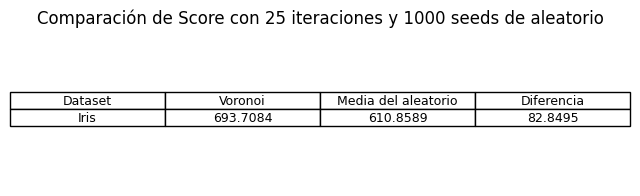

In [ ]:
scoreVoronoiIrisPCA = calinski_harabasz_score(X_iris_pca, resultsIrisPCA25Iter['labelsVoronoi'])
scoreRandomIrisPCA = resultsIrisPCA25Iter['meanScoreRandom']


# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Dataset': ['Iris'],
    'Voronoi': [round(scoreVoronoiIrisPCA, 4)],
    'Media del aleatorio': [round(scoreRandomIrisPCA, 4)],
    'Diferencia': [round(scoreVoronoiIrisPCA - scoreRandomIrisPCA, 4)]
})

# Mostrar la tabla
plt.figure(figsize=(8, 2))
plt.table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
plt.axis('off')
plt.title('Comparación de Score con 25 iteraciones y 1000 seeds de aleatorio')
plt.show()

In [ ]:
def PlotEvolution(X, nClusters, nSeeds, iterMax):
    totalIter = range(1, iterMax + 1)
    mseVoronoi = []
    mseRandom = []

    for iter in totalIter:
        results = CompareKMeansInitializations(X, nClusters, nSeeds, iter, plot = False)
        mseVoronoi.append(calinski_harabasz_score(X, results['labelsVoronoi'], ))
        mseRandom.append(results['meanScoreRandom'])

    plt.figure(figsize=(10, 6))
    plt.plot(totalIter, mseVoronoi, label='Score Voronoi', marker='o')
    plt.plot(totalIter, mseRandom, label='Score Aleatorio', marker='o')
    plt.xlabel('Iteraciones')
    plt.ylabel('Score')
    plt.title(f"Score en función del Número de Iteraciones, {nClusters} clusters")
    plt.legend()
    plt.grid(True)
    plt.show()


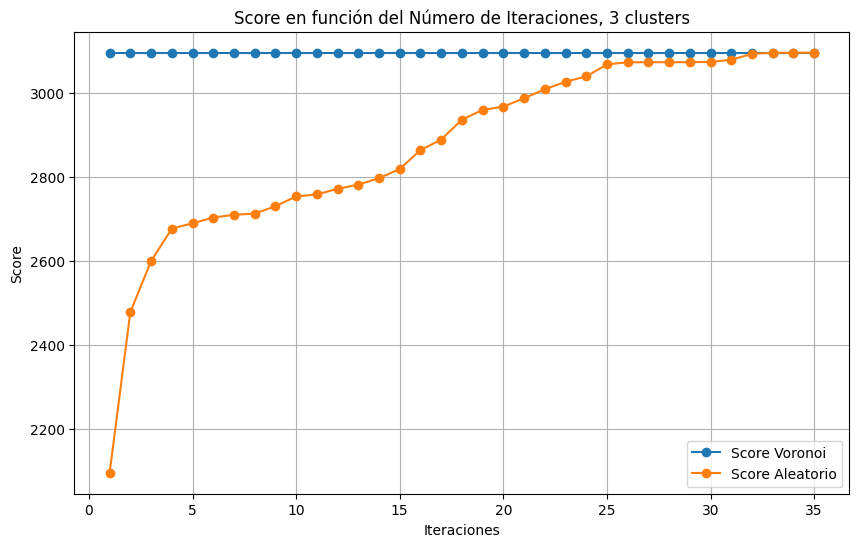

In [ ]:
PlotEvolution(X_blobs, nClusters = 3, nSeeds = 100, iterMax = 35)

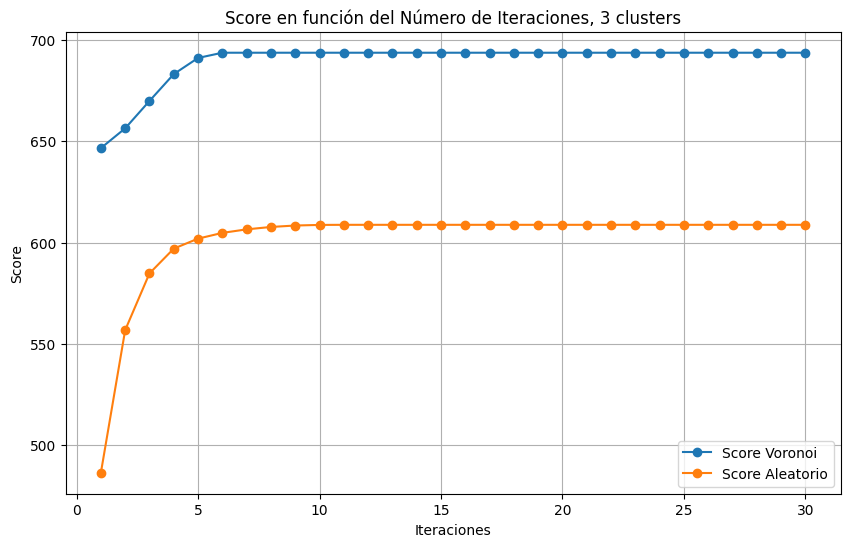

In [ ]:
PlotEvolution(X_iris_pca, nClusters = 3, nSeeds = 100, iterMax = 30)

In [ ]:
blobClusters = 10
# Generar datasets
X_circles, X_blobs, X_moons = GenerateDatasets(0.05, blobClusters)

X_blobs = StandardScaler().fit_transform(X_blobs)

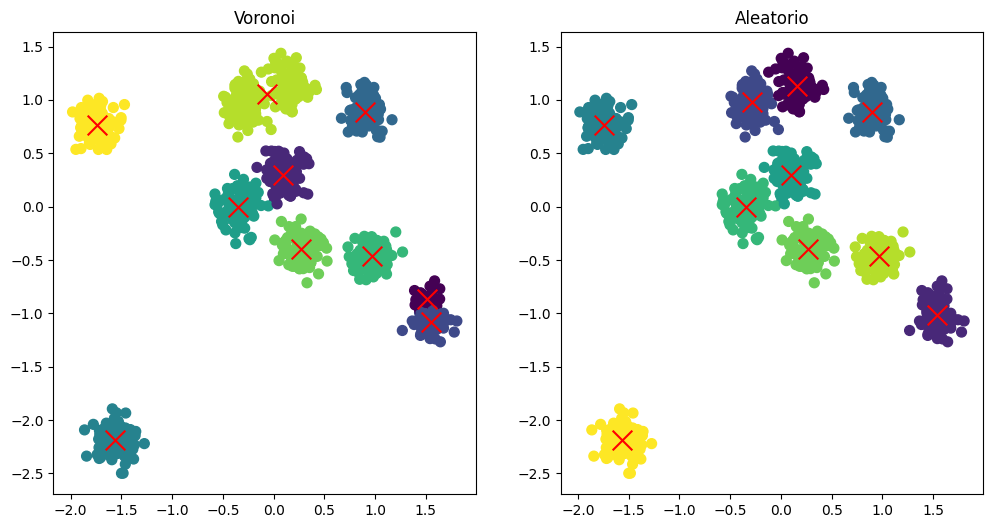

In [ ]:
resultsBlobs10Iter = CompareKMeansInitializations(X_blobs, nClusters=10, nSeeds=1000, iterMax=10)